img.size: torch.Size([3, 1080, 1920])


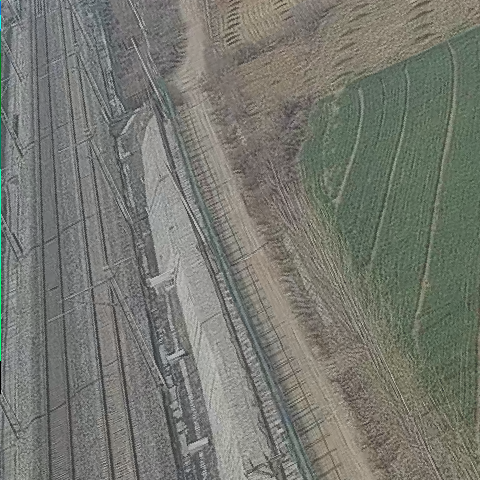

In [6]:
from torchvision import io, utils
from torchvision import datapoints
from torchvision.transforms import v2 as T
from torchvision.transforms.v2 import functional as F

# Defining and wrapping input to appropriate Tensor Subclasses
path = "/opt/data/private/zsf/Railway/part2/frame/K2633基站上行-铁塔西_20230330104349-20230330201349_1/0001.jpg"
img = datapoints.Image(io.read_image(path))
print("img.size:", img.shape)
# img = PIL.Image.open(path)
bboxes = datapoints.BoundingBox(
    [[2, 0, 206, 253], [396, 92, 479, 241], [328, 253, 417, 332],
     [148, 68, 256, 182], [93, 158, 170, 260], [432, 0, 438, 26],
     [422, 0, 480, 25], [419, 39, 424, 52], [448, 37, 456, 62],
     [435, 43, 437, 50], [461, 36, 469, 63], [461, 75, 469, 94],
     [469, 36, 480, 64], [440, 37, 446, 56], [398, 233, 480, 304],
     [452, 39, 463, 63], [424, 38, 429, 50]],
    format=datapoints.BoundingBoxFormat.XYXY,
    spatial_size=F.get_spatial_size(img),
)
labels = [59, 58, 50, 64, 76, 74, 74, 74, 74, 74, 74, 74, 74, 74, 50, 74, 74]
# Defining and applying Transforms V2
trans = T.Compose(
    [
        T.ColorJitter(contrast=0.5),
        T.RandomRotation(30),
        T.CenterCrop(480),
    ]
)
img, bboxes, labels = trans(img, bboxes, labels)
# Visualizing results
viz = utils.draw_bounding_boxes(F.to_image_tensor(img), boxes=bboxes)
F.to_pil_image(viz).show()

In [2]:
trans

Compose(
      ColorJitter(contrast=(0.5, 1.5))
      RandomRotation(degrees=[-30.0, 30.0], interpolation=InterpolationMode.NEAREST, expand=False, fill=0)
      CenterCrop(size=(480, 480))
)

In [3]:
bboxes

BoundingBox([[ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0, 48],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0],
             [ 0,  0,  0, 18],
             [ 0,  0,  0,  0],
             [ 0,  0,  0,  0]], format=BoundingBoxFormat.XYXY, spatial_size=(480, 480))

In [9]:
import torch
bboxes.__new__(0,torch.tensor([1,2,3,4]))

TypeError: __new__() missing 2 required keyword-only arguments: 'format' and 'spatial_size'